In [846]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from scipy.stats import zscore


In [847]:
credits_data=pd.read_csv("tmdb_5000_credits.csv")
movies_data= pd.read_csv("tmdb_5000_movies.csv")


In [848]:
print(movies_data.shape)
print(credits_data.shape)



(4803, 20)
(4803, 4)


In [849]:
movies_data.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [850]:
credits_data.head(1)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [851]:
movies_data=movies_data.merge(credits_data,on='title')
# This means it’s looking for rows in both dataframes that have the same ‘title’ and combining them into a single row in the new dataframe
# بيبص علي الافلام الي ليها نفسم الاسم ويضم cast ,crew 
# كدة هو ضم الاتنين مع بعض بالنسبة لاسم الفلمض
movies_data.shape


(4809, 23)

In [852]:
movies_data.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [853]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

In [854]:
movies_data=movies_data[["crew","cast","vote_average","title","runtime","popularity","overview","keywords","genres","original_language"]]
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   crew               4809 non-null   object 
 1   cast               4809 non-null   object 
 2   vote_average       4809 non-null   float64
 3   title              4809 non-null   object 
 4   runtime            4807 non-null   float64
 5   popularity         4809 non-null   float64
 6   overview           4806 non-null   object 
 7   keywords           4809 non-null   object 
 8   genres             4809 non-null   object 
 9   original_language  4809 non-null   object 
dtypes: float64(3), object(7)
memory usage: 375.8+ KB


# preprocessing 

In [855]:
movies_data.isnull().sum()

crew                 0
cast                 0
vote_average         0
title                0
runtime              2
popularity           0
overview             3
keywords             0
genres               0
original_language    0
dtype: int64

In [856]:
movies_data.dropna(inplace=True)
movies_data.isnull().sum()

crew                 0
cast                 0
vote_average         0
title                0
runtime              0
popularity           0
overview             0
keywords             0
genres               0
original_language    0
dtype: int64

In [857]:
movies_data.duplicated().sum()

0

# preprocessing to categorical data

# Gneres

In [858]:
movies_data.iloc[0].genres
# the genres  info of the frist row 
#actually list of map in the frist cell (0,0 )
# different id belongs to different categories of gnres not films 

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [859]:
#'[{"id": 28, "name": "Action"},
#{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'
# the frist film have  4 categories
# the list has type string ('list')....!

# convert('[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]')
#TypeError: string indices must be integers, not 'str'
'''

'''

'\n\n'

In [860]:
import ast
ast.literal_eval('[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]')
# convert from string to normal list 

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [861]:
def convert_to_list_names(list_map_genres):
    names_genres =[]
    film_with_no_gneres_name=[]
    counter =0
    for i in ast.literal_eval(list_map_genres):
        
        if 'name' in i and i['name']:
          # key لو  موجود اصلا وكمان ليه قيمة 
          x= i['name']
          names_genres.append(str(x))
        
    return names_genres
    


In [862]:
movies_data["genres"]=movies_data['genres'].apply(convert_to_list_names)
movies_data["genres"]

0       [Action, Adventure, Fantasy, Science Fiction]
1                        [Adventure, Fantasy, Action]
2                          [Action, Adventure, Crime]
3                    [Action, Crime, Drama, Thriller]
4                [Action, Adventure, Science Fiction]
                            ...                      
4804                        [Action, Crime, Thriller]
4805                                [Comedy, Romance]
4806               [Comedy, Drama, Romance, TV Movie]
4807                                               []
4808                                    [Documentary]
Name: genres, Length: 4806, dtype: object

In [863]:
mask = movies_data['genres'].apply(lambda x: x != [])
movies_data = movies_data[mask]

In [864]:
movies_data['genres']

0       [Action, Adventure, Fantasy, Science Fiction]
1                        [Adventure, Fantasy, Action]
2                          [Action, Adventure, Crime]
3                    [Action, Crime, Drama, Thriller]
4                [Action, Adventure, Science Fiction]
                            ...                      
4803                              [Foreign, Thriller]
4804                        [Action, Crime, Thriller]
4805                                [Comedy, Romance]
4806               [Comedy, Drama, Romance, TV Movie]
4808                                    [Documentary]
Name: genres, Length: 4778, dtype: object

# function to set scores  to each list based on weights to each categories in it 

In [865]:
def assign_values(list):
    if list is None:
        return None
    # Create a new list to store the values
    values = []
    scores={
    "Drama":1,"Comedy":2,"Action" :3 ,"Adventure":4,"Horror":5,"Crime" :6 ,"Thriller":7,"Animation" :8, "Fantasy":9,          
    "Romance" :10,"Science Fiction":11,"Documentary":12,"Family ":13,"Mystery" :14,"Music":15,"Western" :16 ,"History" :17,
    "War" : 18,"TV Movie" :19,"Foreign": 20     
    }
    # Iterate over each word in the input list
    for word in list:
        word = str((word))
        # Get the value of the word from the word_weights dictionary
        # If the word is not in the dictionary, assign a default value (e.g., 0)
        value = scores.get(word, 0)
        values.append(value)
    return sum(values)
arwa= assign_values(['Action', 'Adventure', 'Fantasy'])
arwa


16

In [866]:
movies_data["predicted_label_score"]=movies_data['genres'].apply(assign_values)
movies_data["predicted_label_score"]

0       27
1       16
2       13
3       17
4       18
        ..
4803    27
4804    16
4805    12
4806    32
4808    12
Name: predicted_label_score, Length: 4778, dtype: int64

# Key_words

In [867]:
movies_data["keywords"]  # نفس الكلام مفهاش غير id & name 

0       [{"id": 1463, "name": "culture clash"}, {"id":...
1       [{"id": 270, "name": "ocean"}, {"id": 726, "na...
2       [{"id": 470, "name": "spy"}, {"id": 818, "name...
3       [{"id": 849, "name": "dc comics"}, {"id": 853,...
4       [{"id": 818, "name": "based on novel"}, {"id":...
                              ...                        
4803                                                   []
4804    [{"id": 5616, "name": "united states\u2013mexi...
4805                                                   []
4806    [{"id": 248, "name": "date"}, {"id": 699, "nam...
4808    [{"id": 1523, "name": "obsession"}, {"id": 224...
Name: keywords, Length: 4778, dtype: object

In [868]:
movies_data["keywords"] = movies_data["keywords"].apply(convert_to_list_names)
movies_data["keywords"]

0       [culture clash, future, space war, space colon...
1       [ocean, drug abuse, exotic island, east india ...
2       [spy, based on novel, secret agent, sequel, mi...
3       [dc comics, crime fighter, terrorist, secret i...
4       [based on novel, mars, medallion, space travel...
                              ...                        
4803                                                   []
4804    [united states–mexico barrier, legs, arms, pap...
4805                                                   []
4806    [date, love at first sight, narration, investi...
4808            [obsession, camcorder, crush, dream girl]
Name: keywords, Length: 4778, dtype: object

# cast

In [869]:
ast.literal_eval(movies_data["cast"][0])   # كل دة موجود للفلم الواحد :) 


[{'cast_id': 242,
  'character': 'Jake Sully',
  'credit_id': '5602a8a7c3a3685532001c9a',
  'gender': 2,
  'id': 65731,
  'name': 'Sam Worthington',
  'order': 0},
 {'cast_id': 3,
  'character': 'Neytiri',
  'credit_id': '52fe48009251416c750ac9cb',
  'gender': 1,
  'id': 8691,
  'name': 'Zoe Saldana',
  'order': 1},
 {'cast_id': 25,
  'character': 'Dr. Grace Augustine',
  'credit_id': '52fe48009251416c750aca39',
  'gender': 1,
  'id': 10205,
  'name': 'Sigourney Weaver',
  'order': 2},
 {'cast_id': 4,
  'character': 'Col. Quaritch',
  'credit_id': '52fe48009251416c750ac9cf',
  'gender': 2,
  'id': 32747,
  'name': 'Stephen Lang',
  'order': 3},
 {'cast_id': 5,
  'character': 'Trudy Chacon',
  'credit_id': '52fe48009251416c750ac9d3',
  'gender': 1,
  'id': 17647,
  'name': 'Michelle Rodriguez',
  'order': 4},
 {'cast_id': 8,
  'character': 'Selfridge',
  'credit_id': '52fe48009251416c750ac9e1',
  'gender': 2,
  'id': 1771,
  'name': 'Giovanni Ribisi',
  'order': 5},
 {'cast_id': 7,
  'c

In [870]:
def convert_cast(list_map_cast):
    names_cast =[]
    acctress_counter =0
    for i in ast.literal_eval(list_map_cast):
        if acctress_counter != 3:
          # هياخد اول تلت ممثلين بس 
          names_cast.append(i['name'])
          acctress_counter+=1
        else:
           break
    return names_cast
    


In [871]:
movies_data["cast"]=movies_data['cast'].apply(convert_cast)
movies_data.head()

,crew,cast,vote_average,title,runtime,popularity,overview,keywords,genres,original_language,predicted_label_score
0,"[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",7.2,Avatar,162.0,150.437577,"In the 22nd century, a paraplegic Marine is di...","[culture clash, future, space war, space colon...","[Action, Adventure, Fantasy, Science Fiction]",en,27
1,"[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","[Johnny Depp, Orlando Bloom, Keira Knightley]",6.9,Pirates of the Caribbean: At World's End,169.0,139.082615,"Captain Barbossa, long believed to be dead, ha...","[ocean, drug abuse, exotic island, east india ...","[Adventure, Fantasy, Action]",en,16
2,"[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",6.3,Spectre,148.0,107.376788,A cryptic message from Bond’s past sends him o...,"[spy, based on novel, secret agent, sequel, mi...","[Action, Adventure, Crime]",en,13
3,"[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...","[Christian Bale, Michael Caine, Gary Oldman]",7.6,The Dark Knight Rises,165.0,112.312950,Following the death of District Attorney Harve...,"[dc comics, crime fighter, terrorist, secret i...","[Action, Crime, Drama, Thriller]",en,17
4,"[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",6.1,John Carter,132.0,43.926995,"John Carter is a war-weary, former military ca...","[based on novel, mars, medallion, space travel...","[Action, Adventure, Science Fiction]",en,18


# crew

In [872]:
ast.literal_eval(movies_data["crew"][2])

[{'credit_id': '54805967c3a36829b5002c41',
  'department': 'Sound',
  'gender': 2,
  'id': 153,
  'job': 'Original Music Composer',
  'name': 'Thomas Newman'},
 {'credit_id': '52fe4d22c3a368484e1d8d77',
  'department': 'Directing',
  'gender': 2,
  'id': 39,
  'job': 'Director',
  'name': 'Sam Mendes'},
 {'credit_id': '5677cd99925141691a005333',
  'department': 'Art',
  'gender': 1,
  'id': 8384,
  'job': 'Set Decoration',
  'name': 'Anna Pinnock'},
 {'credit_id': '52fe4d22c3a368484e1d8d8d',
  'department': 'Writing',
  'gender': 2,
  'id': 932,
  'job': 'Screenplay',
  'name': 'John Logan'},
 {'credit_id': '562fc9bb92514129fe0006b4',
  'department': 'Writing',
  'gender': 2,
  'id': 932,
  'job': 'Story',
  'name': 'John Logan'},
 {'credit_id': '5654d41c92514145c3000373',
  'department': 'Art',
  'gender': 2,
  'id': 4248,
  'job': 'Production Design',
  'name': 'Dennis Gassner'},
 {'credit_id': '52fe4d22c3a368484e1d8d71',
  'department': 'Writing',
  'gender': 2,
  'id': 9856,
  'job

In [873]:
def convert_director(list_map_crew):
   directors_names=[]
   for i in ast.literal_eval(list_map_crew):
       if i["job"]=='Director':
           directors_names.append(i["name"])
   return directors_names

In [874]:
movies_data["crew"].apply(convert_director)

0                                [James Cameron]
1                               [Gore Verbinski]
2                                   [Sam Mendes]
3                            [Christopher Nolan]
4                               [Andrew Stanton]
                          ...                   
4803             [Neill Dela Llana, Ian Gamazon]
4804                          [Robert Rodriguez]
4805                              [Edward Burns]
4806                               [Scott Smith]
4808    [Brian Herzlinger, Jon Gunn, Brett Winn]
Name: crew, Length: 4778, dtype: object

In [875]:
movies_data["crew"]= movies_data["crew"].apply(convert_director)
movies_data.head()

,crew,cast,vote_average,title,runtime,popularity,overview,keywords,genres,original_language,predicted_label_score
0,[James Cameron],"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",7.2,Avatar,162.0,150.437577,"In the 22nd century, a paraplegic Marine is di...","[culture clash, future, space war, space colon...","[Action, Adventure, Fantasy, Science Fiction]",en,27
1,[Gore Verbinski],"[Johnny Depp, Orlando Bloom, Keira Knightley]",6.9,Pirates of the Caribbean: At World's End,169.0,139.082615,"Captain Barbossa, long believed to be dead, ha...","[ocean, drug abuse, exotic island, east india ...","[Adventure, Fantasy, Action]",en,16
2,[Sam Mendes],"[Daniel Craig, Christoph Waltz, Léa Seydoux]",6.3,Spectre,148.0,107.376788,A cryptic message from Bond’s past sends him o...,"[spy, based on novel, secret agent, sequel, mi...","[Action, Adventure, Crime]",en,13
3,[Christopher Nolan],"[Christian Bale, Michael Caine, Gary Oldman]",7.6,The Dark Knight Rises,165.0,112.312950,Following the death of District Attorney Harve...,"[dc comics, crime fighter, terrorist, secret i...","[Action, Crime, Drama, Thriller]",en,17
4,[Andrew Stanton],"[Taylor Kitsch, Lynn Collins, Samantha Morton]",6.1,John Carter,132.0,43.926995,"John Carter is a war-weary, former military ca...","[based on novel, mars, medallion, space travel...","[Action, Adventure, Science Fiction]",en,18


# Overview

In [876]:
movies_data["overview"][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [877]:

# dont nead to convert it to list of words keep it list with one element ( pragraph )
#movies_data["overview"]=movies_data["overview"].str.split()
movies_data["overview"]=movies_data["overview"].apply(lambda x:[x])
movies_data["overview"]



0       [In the 22nd century, a paraplegic Marine is d...
1       [Captain Barbossa, long believed to be dead, h...
2       [A cryptic message from Bond’s past sends him ...
3       [Following the death of District Attorney Harv...
4       [John Carter is a war-weary, former military c...
                              ...                        
4803    [Adam, a security guard, travels from Californ...
4804    [El Mariachi just wants to play his guitar and...
4805    [A newlywed couple's honeymoon is upended by t...
4806    ["Signed, Sealed, Delivered" introduces a dedi...
4808    [Ever since the second grade when he first saw...
Name: overview, Length: 4778, dtype: object

In [878]:
movies_data.head(1)

,crew,cast,vote_average,title,runtime,popularity,overview,keywords,genres,original_language,predicted_label_score
0,[James Cameron],"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",7.2,Avatar,162.0,150.437577,"[In the 22nd century, a paraplegic Marine is d...","[culture clash, future, space war, space colon...","[Action, Adventure, Fantasy, Science Fiction]",en,27


In [879]:

movies_data["genres"]=movies_data["genres"].apply(lambda x:[i.replace(" ","")for i in x])
movies_data["cast"]=movies_data["cast"].apply(lambda x:[i.replace(" ","")for i in x])
movies_data["crew"]=movies_data["crew"].apply(lambda x:[i.replace(" ","")for i in x])
movies_data["keywords"]=movies_data["keywords"].apply(lambda x:[i.replace(" ","")for i in x])

# merging all categorical data in one coloumn (now the entire coloumns bacomes one coloumn  has a one  list for each film  contains all information as an elements)

In [880]:
movies_data["total_info"]=movies_data["overview"]+movies_data["genres"]+movies_data["keywords"]+movies_data["cast"]+movies_data["crew"]
movies_data["total_info"][0]


['In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.',
 'Action',
 'Adventure',
 'Fantasy',
 'ScienceFiction',
 'cultureclash',
 'future',
 'spacewar',
 'spacecolony',
 'society',
 'spacetravel',
 'futuristic',
 'romance',
 'space',
 'alien',
 'tribe',
 'alienplanet',
 'cgi',
 'marine',
 'soldier',
 'battle',
 'loveaffair',
 'antiwar',
 'powerrelations',
 'mindandsoul',
 '3d',
 'SamWorthington',
 'ZoeSaldana',
 'SigourneyWeaver',
 'JamesCameron']

In [881]:
# convert the list and its elements to one string 
movies_data["total_info"] = movies_data["total_info"].apply(" ".join)
movies_data["total_info"][0]


'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d SamWorthington ZoeSaldana SigourneyWeaver JamesCameron'

In [882]:
movies_data["total_info"]=movies_data["total_info"].apply(lambda x:x.lower())
movies_data["total_info"][0]

'in the 22nd century, a paraplegic marine is dispatched to the moon pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. action adventure fantasy sciencefiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d samworthington zoesaldana sigourneyweaver jamescameron'

In [883]:
movies_data.head()

,crew,cast,vote_average,title,runtime,popularity,overview,keywords,genres,original_language,predicted_label_score,total_info
0,[JamesCameron],"[SamWorthington, ZoeSaldana, SigourneyWeaver]",7.2,Avatar,162.0,150.437577,"[In the 22nd century, a paraplegic Marine is d...","[cultureclash, future, spacewar, spacecolony, ...","[Action, Adventure, Fantasy, ScienceFiction]",en,27,"in the 22nd century, a paraplegic marine is di..."
1,[GoreVerbinski],"[JohnnyDepp, OrlandoBloom, KeiraKnightley]",6.9,Pirates of the Caribbean: At World's End,169.0,139.082615,"[Captain Barbossa, long believed to be dead, h...","[ocean, drugabuse, exoticisland, eastindiatrad...","[Adventure, Fantasy, Action]",en,16,"captain barbossa, long believed to be dead, ha..."
2,[SamMendes],"[DanielCraig, ChristophWaltz, LéaSeydoux]",6.3,Spectre,148.0,107.376788,[A cryptic message from Bond’s past sends him ...,"[spy, basedonnovel, secretagent, sequel, mi6, ...","[Action, Adventure, Crime]",en,13,a cryptic message from bond’s past sends him o...
3,[ChristopherNolan],"[ChristianBale, MichaelCaine, GaryOldman]",7.6,The Dark Knight Rises,165.0,112.312950,[Following the death of District Attorney Harv...,"[dccomics, crimefighter, terrorist, secretiden...","[Action, Crime, Drama, Thriller]",en,17,following the death of district attorney harve...
4,[AndrewStanton],"[TaylorKitsch, LynnCollins, SamanthaMorton]",6.1,John Carter,132.0,43.926995,"[John Carter is a war-weary, former military c...","[basedonnovel, mars, medallion, spacetravel, p...","[Action, Adventure, ScienceFiction]",en,18,"john carter is a war-weary, former military ca..."


In [884]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4778 entries, 0 to 4808
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   crew                   4778 non-null   object 
 1   cast                   4778 non-null   object 
 2   vote_average           4778 non-null   float64
 3   title                  4778 non-null   object 
 4   runtime                4778 non-null   float64
 5   popularity             4778 non-null   float64
 6   overview               4778 non-null   object 
 7   keywords               4778 non-null   object 
 8   genres                 4778 non-null   object 
 9   original_language      4778 non-null   object 
 10  predicted_label_score  4778 non-null   int64  
 11  total_info             4778 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 614.3+ KB


In [885]:
edited_movies_data = movies_data[['vote_average','popularity','runtime','title','original_language','total_info',"genres","predicted_label_score"]]
edited_movies_data.head(1)

,vote_average,popularity,runtime,title,original_language,total_info,genres,predicted_label_score
0,7.2,150.437577,162.0,Avatar,en,"in the 22nd century, a paraplegic marine is di...","[Action, Adventure, Fantasy, ScienceFiction]",27


# language

In [886]:
movies_data["original_language"].value_counts()
# imbalanced data # number of sampeles that have an english language is too much than others...
# smote...


original_language
en    4481
fr      70
es      32
zh      27
de      26
hi      19
ja      16
it      13
ko      12
cn      12
ru      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: count, dtype: int64

In [887]:
kept_lang=["en","fr","es","zh","de"]
edited_movies_data= edited_movies_data[edited_movies_data["original_language"].isin(kept_lang)]


In [888]:
edited_movies_data["original_language"].value_counts()

original_language
en    4481
fr      70
es      32
zh      27
de      26
Name: count, dtype: int64

# vote_average

In [889]:
edited_movies_data["vote_average"].value_counts()

vote_average
6.0    210
6.7    207
6.5    207
6.3    202
6.2    200
      ... 
2.7      1
9.3      1
2.2      1
1.9      1
2.6      1
Name: count, Length: 69, dtype: int64

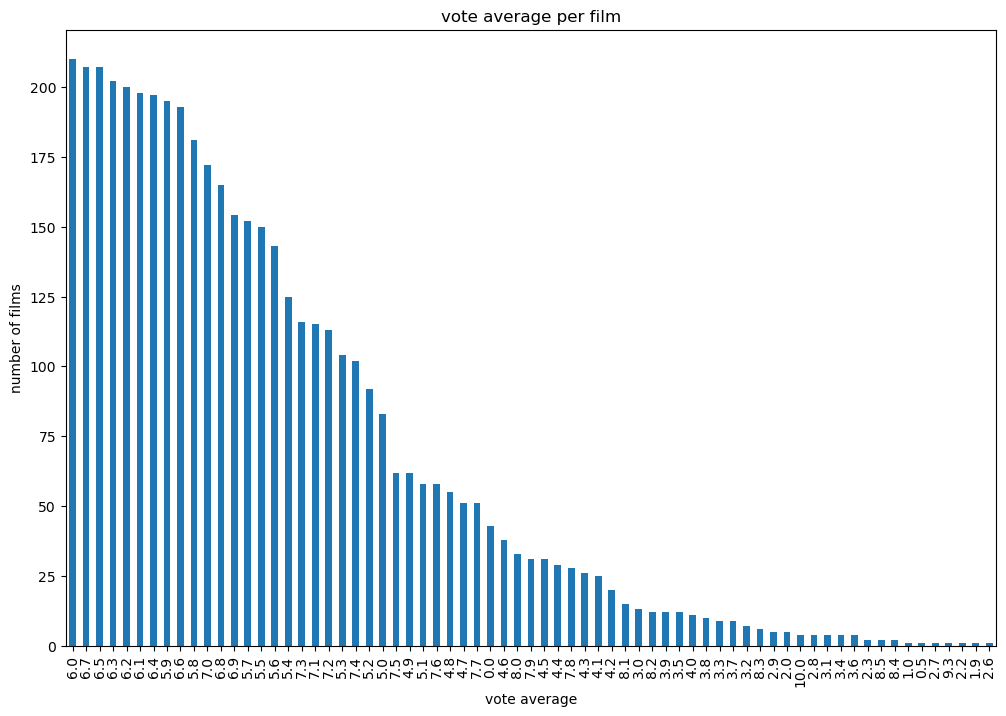

In [890]:
fig, ax = plt.subplots(figsize=(12, 8)) 
vote_data = edited_movies_data["vote_average"].value_counts()
vote_data.plot(kind='bar')
plt.title('vote average per film')
plt.xlabel('vote average')
plt.ylabel('number of films')
plt.show()

# removing outliers using z_score 
z_score >>> outliers 
عشان بعد كدة لما اعمل 
over sampling
اكون شلتهم وبالتالي حتي النقط الجديدة 
الي هتطلع من 
smote
تكون برضو 
تبع normal distribution >>>> 
مش عاوزة 
outliers اكتر 
z=x-mean/std



In [891]:
edited_movies_data["vote_average_z_score"]=zscore(edited_movies_data["vote_average"])
outliers_average_vote = edited_movies_data[edited_movies_data['vote_average_z_score'].abs() > 3]
outliers_average_vote


,vote_average,popularity,runtime,title,original_language,total_info,genres,predicted_label_score,vote_average_z_score
1104,2.3,5.258726,87.0,Foodfight!,en,"dex, a superdog sleuth, is the law of the land...","[Animation, Action, Comedy, Family]",13,-3.382009
1470,0.0,0.126738,100.0,Black Water Transit,en,in this action thriller set in post-katrina ne...,"[Drama, Crime]",7,-5.427958
2226,1.9,5.886228,88.0,Superbabies: Baby Geniuses 2,en,"following on from the plot of the last movie, ...","[Comedy, Family]",2,-3.737827
2262,2.2,0.285760,88.0,The Oogieloves in the Big Balloon Adventure,en,"it's schluufy's birthday, and the oogieloves (...",[Family],0,-3.470964
2278,0.5,0.485405,98.0,Dwegons,en,family inherits an old house and to their surp...,[Animation],8,-4.983187
3394,2.7,0.587276,95.0,Chairman of the Board,en,a surfer becomes the head of a major company. ...,[Comedy],2,-3.026192
3524,10.0,0.356495,99.0,Stiff Upper Lips,en,stiff upper lips is a broad parody of british ...,[Comedy],2,3.467471
3677,0.0,0.407030,0.0,Should've Been Romeo,en,"a self-centered, middle-aged pitchman for a po...","[Comedy, Drama]",3,-5.427958
3678,0.0,0.028756,88.0,Running Forever,en,after being estranged since her mother's death...,[Family],0,-5.427958
3697,1.0,0.137535,89.0,All Hat,en,an ex-con returns to his rural ontario roots a...,"[Action, Comedy, Drama, Western]",22,-4.538415


In [892]:
edited_movies_data = edited_movies_data[~edited_movies_data.index.isin(outliers_average_vote.index)]
edited_movies_data

,vote_average,popularity,runtime,title,original_language,total_info,genres,predicted_label_score,vote_average_z_score
0,7.2,150.437577,162.0,Avatar,en,"in the 22nd century, a paraplegic marine is di...","[Action, Adventure, Fantasy, ScienceFiction]",27,0.976751
1,6.9,139.082615,169.0,Pirates of the Caribbean: At World's End,en,"captain barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]",16,0.709888
2,6.3,107.376788,148.0,Spectre,en,a cryptic message from bond’s past sends him o...,"[Action, Adventure, Crime]",13,0.176163
3,7.6,112.312950,165.0,The Dark Knight Rises,en,following the death of district attorney harve...,"[Action, Crime, Drama, Thriller]",17,1.332568
4,6.1,43.926995,132.0,John Carter,en,"john carter is a war-weary, former military ca...","[Action, Adventure, ScienceFiction]",18,-0.001746
...,...,...,...,...,...,...,...,...,...
4803,7.5,0.022173,80.0,Cavite,en,"adam, a security guard, travels from californi...","[Foreign, Thriller]",27,1.243614
4804,6.6,14.269792,81.0,El Mariachi,es,el mariachi just wants to play his guitar and ...,"[Action, Crime, Thriller]",16,0.443025
4805,5.9,0.642552,85.0,Newlyweds,en,a newlywed couple's honeymoon is upended by th...,"[Comedy, Romance]",12,-0.179655
4806,7.0,1.444476,120.0,"Signed, Sealed, Delivered",en,"""signed, sealed, delivered"" introduces a dedic...","[Comedy, Drama, Romance, TVMovie]",32,0.798843


In [893]:
edited_movies_data["vote_average"].describe()

count    4576.000000
mean        6.167657
std         0.929193
min         2.800000
25%         5.600000
50%         6.200000
75%         6.800000
max         9.300000
Name: vote_average, dtype: float64

# popularity

طب احط متوسط الداتا كلها ما هو اصلا متأثر بال 
outliers

very long runtime or extremely high popularity  unusual but i think its  valid.... 

In [894]:
edited_movies_data["popularity"].describe()
# high std ....
# high difference between min and max ..

count    4576.000000
mean       22.211944
std        32.270140
min         0.000372
25%         5.224219
50%        13.852533
75%        29.118588
max       875.581305
Name: popularity, dtype: float64

In [895]:

edited_movies_data["popularity_z_score"]=zscore(edited_movies_data["popularity"])
outliers_popularity = edited_movies_data[edited_movies_data['popularity_z_score'].abs() > 3]
outliers_popularity.shape

#(53, 10)

(51, 10)

In [896]:
edited_movies_data = edited_movies_data[~edited_movies_data.index.isin(outliers_popularity.index)]
edited_movies_data

,vote_average,popularity,runtime,title,original_language,total_info,genres,predicted_label_score,vote_average_z_score,popularity_z_score
2,6.3,107.376788,148.0,Spectre,en,a cryptic message from bond’s past sends him o...,"[Action, Adventure, Crime]",13,0.176163,2.639411
3,7.6,112.312950,165.0,The Dark Knight Rises,en,following the death of district attorney harve...,"[Action, Crime, Drama, Thriller]",17,1.332568,2.792391
4,6.1,43.926995,132.0,John Carter,en,"john carter is a war-weary, former military ca...","[Action, Adventure, ScienceFiction]",18,-0.001746,0.672988
5,5.9,115.699814,139.0,Spider-Man 3,en,the seemingly invincible spider-man goes up ag...,"[Fantasy, Action, Adventure]",16,-0.179655,2.897356
6,7.4,48.681969,100.0,Tangled,en,when the kingdom's most wanted-and most charmi...,"[Animation, Family]",8,1.154660,0.820353
...,...,...,...,...,...,...,...,...,...,...
4803,7.5,0.022173,80.0,Cavite,en,"adam, a security guard, travels from californi...","[Foreign, Thriller]",27,1.243614,-0.687701
4804,6.6,14.269792,81.0,El Mariachi,es,el mariachi just wants to play his guitar and ...,"[Action, Crime, Thriller]",16,0.443025,-0.246141
4805,5.9,0.642552,85.0,Newlyweds,en,a newlywed couple's honeymoon is upended by th...,"[Comedy, Romance]",12,-0.179655,-0.668474
4806,7.0,1.444476,120.0,"Signed, Sealed, Delivered",en,"""signed, sealed, delivered"" introduces a dedic...","[Comedy, Drama, Romance, TVMovie]",32,0.798843,-0.643621


# run time

In [897]:
edited_movies_data["runtime"].describe()


count    4525.000000
mean      106.848619
std        21.212512
min         0.000000
25%        94.000000
50%       103.000000
75%       117.000000
max       338.000000
Name: runtime, dtype: float64

In [898]:

edited_movies_data["run_time_z_score"]=zscore(edited_movies_data["runtime"])
outliers_run_time = edited_movies_data[edited_movies_data["run_time_z_score"].abs() > 3]
outliers_run_time.shape
#(84, 11)

C:\Users\arwah\AppData\Local\Temp\ipykernel_2612\4135329700.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edited_movies_data["run_time_z_score"]=zscore(edited_movies_data["runtime"])


(80, 11)

In [899]:
edited_movies_data = edited_movies_data[~edited_movies_data.index.isin(outliers_run_time.index)]
edited_movies_data

,vote_average,popularity,runtime,title,original_language,total_info,genres,predicted_label_score,vote_average_z_score,popularity_z_score,run_time_z_score
2,6.3,107.376788,148.0,Spectre,en,a cryptic message from bond’s past sends him o...,"[Action, Adventure, Crime]",13,0.176163,2.639411,1.940172
3,7.6,112.312950,165.0,The Dark Knight Rises,en,following the death of district attorney harve...,"[Action, Crime, Drama, Thriller]",17,1.332568,2.792391,2.741675
4,6.1,43.926995,132.0,John Carter,en,"john carter is a war-weary, former military ca...","[Action, Adventure, ScienceFiction]",18,-0.001746,0.672988,1.185817
5,5.9,115.699814,139.0,Spider-Man 3,en,the seemingly invincible spider-man goes up ag...,"[Fantasy, Action, Adventure]",16,-0.179655,2.897356,1.515848
6,7.4,48.681969,100.0,Tangled,en,when the kingdom's most wanted-and most charmi...,"[Animation, Family]",8,1.154660,0.820353,-0.322893
...,...,...,...,...,...,...,...,...,...,...,...
4803,7.5,0.022173,80.0,Cavite,en,"adam, a security guard, travels from californi...","[Foreign, Thriller]",27,1.243614,-0.687701,-1.265837
4804,6.6,14.269792,81.0,El Mariachi,es,el mariachi just wants to play his guitar and ...,"[Action, Crime, Thriller]",16,0.443025,-0.246141,-1.218690
4805,5.9,0.642552,85.0,Newlyweds,en,a newlywed couple's honeymoon is upended by th...,"[Comedy, Romance]",12,-0.179655,-0.668474,-1.030101
4806,7.0,1.444476,120.0,"Signed, Sealed, Delivered",en,"""signed, sealed, delivered"" introduces a dedic...","[Comedy, Drama, Romance, TVMovie]",32,0.798843,-0.643621,0.620051


In [900]:
edited_movies_data = edited_movies_data.reset_index(drop=True)

# hot encoding & victorization 

# total info

In [901]:
edited_movies_data.head(1)
edited_movies_data["total_info"][0]

'a cryptic message from bond’s past sends him on a trail to uncover a sinister organization. while m battles political forces to keep the secret service alive, bond peels back the layers of deceit to reveal the terrible truth behind spectre. action adventure crime spy basedonnovel secretagent sequel mi6 britishsecretservice unitedkingdom danielcraig christophwaltz léaseydoux sammendes'

In [902]:
edited_movies_data.head(1)

,vote_average,popularity,runtime,title,original_language,total_info,genres,predicted_label_score,vote_average_z_score,popularity_z_score,run_time_z_score
0,6.3,107.376788,148.0,Spectre,en,a cryptic message from bond’s past sends him o...,"[Action, Adventure, Crime]",13,0.176163,2.639411,1.940172


set the nouns, verbs , ploral  that is belongs to the same root word to its root becuase the vectorization treats every word as a unique one ...

In [903]:
import nltk
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

#actor actors acting = act (stem)
def stem(text):
    stemmed_words=[]
    for i in text.split():
        stemmed_words.append(ps.stem(i))
    return " ".join(stemmed_words)

ps.stem('acting') # act 
ps.stem('in the 22nd century, a paraplegic marine is dispatched to the moon pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. action adventure fantasy sciencefiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d samworthington zoesaldana sigourneyweaver jamescameron')

'in the 22nd century, a paraplegic marine is dispatched to the moon pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. action adventure fantasy sciencefiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d samworthington zoesaldana sigourneyweaver jamescameron'

In [904]:
edited_movies_data["total_info"]=edited_movies_data["total_info"].apply(stem)
# all the words for each film totale info return to its stemmed 

In [905]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words="english",)
# max features = number of words among the entire total info coloumn

In [906]:
total_info_vectors=cv.fit_transform(edited_movies_data["total_info"]).toarray()
total_info_vectors
# (4726, 5000) 

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [907]:
cv.get_feature_names_out()
# unique words names 

array(['000', '007', '10', ..., 'zone', 'zoo', 'zooeydeschanel'],
      dtype=object)

In [908]:
edited_movies_data["vict_total_info"]=list(total_info_vectors)
edited_movies_data["vict_total_info"]

0       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
                              ...                        
4440    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4441    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4442    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4443    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4444    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: vict_total_info, Length: 4445, dtype: object

In [909]:
edited_movies_data["vict_total_info_sum"]=[sum(lst) for lst in total_info_vectors]
edited_movies_data["vict_total_info_sum"][0]

30

# measure the similarity between vectors (using  angeles) >>> for recommendation function

In [910]:
from sklearn.metrics.pairwise import cosine_similarity
similarity=cosine_similarity(total_info_vectors)
sorted(similarity[1])
 # measure similarity between second vector and all vectors
sorted(similarity[1],reverse=True)

[0.9999999999999999,
 0.3247027084163318,
 0.3202563076101742,
 0.31581014591912665,
 0.30535240827622956,
 0.3019405424385589,
 0.2970140370712102,
 0.26148818018424536,
 0.2567762955065477,
 0.21025856676559,
 0.2067245576486807,
 0.2021892755431259,
 0.1976664844429603,
 0.1976664844429603,
 0.19743679743474613,
 0.1971041319963609,
 0.18663625434750084,
 0.1849000654084097,
 0.1849000654084097,
 0.1849000654084097,
 0.18183351671314585,
 0.18183351671314585,
 0.18183351671314585,
 0.17739371879672483,
 0.17739371879672478,
 0.17722938923964165,
 0.1772293892396416,
 0.17593288763724918,
 0.1754116038614058,
 0.17225077552896434,
 0.16984155512168936,
 0.1689815923548436,
 0.16537964611894457,
 0.16531163063339513,
 0.16531163063339513,
 0.16531163063339513,
 0.16343011261515333,
 0.1626903669564168,
 0.16012815380508713,
 0.15914876753019164,
 0.15781069215799975,
 0.1576833055970887,
 0.15724272550828775,
 0.15701857325533192,
 0.1540833878403414,
 0.1540833878403414,
 0.152162621

In [911]:
sorted(list(enumerate(similarity[0])),reverse=True,key=lambda x:x[1])[1:6]
# sorting based on similarity 
#first element of each tuple is the index (the counter) and the second element is the value from similarity[0]
# put all tupels in list 
#five items with the highest similarity scores, excluding the first item.(similarity of vectot with itself)


[(7, 0.3609974361905776),
 (17, 0.32780503405359285),
 (1272, 0.32639560491693337),
 (3847, 0.25354627641855493),
 (1662, 0.2390457218668787)]

# original_language 
(hot encoding)

In [912]:
edited_movies_data["original_language"].value_counts()

original_language
en    4292
fr      69
es      32
zh      27
de      25
Name: count, dtype: int64

In [913]:
edited_movies_data=pd.get_dummies(edited_movies_data,columns=["original_language"])
edited_movies_data.head(1)

,vote_average,popularity,runtime,title,total_info,genres,predicted_label_score,vote_average_z_score,popularity_z_score,run_time_z_score,vict_total_info,vict_total_info_sum,original_language_de,original_language_en,original_language_es,original_language_fr,original_language_zh
0,6.3,107.376788,148.0,Spectre,a cryptic messag from bond’ past send him on a...,"[Action, Adventure, Crime]",13,0.176163,2.639411,1.940172,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",30,False,True,False,False,False


In [914]:
final_movies_data=edited_movies_data[["title","total_info","genres","predicted_label_score","vote_average_z_score","popularity_z_score","run_time_z_score","vict_total_info","original_language_de","original_language_es","original_language_fr","original_language_zh","original_language_en","vict_total_info_sum"]]
final_movies_data.head(1)

,title,total_info,genres,predicted_label_score,vote_average_z_score,popularity_z_score,run_time_z_score,vict_total_info,original_language_de,original_language_es,original_language_fr,original_language_zh,original_language_en,vict_total_info_sum
0,Spectre,a cryptic messag from bond’ past send him on a...,"[Action, Adventure, Crime]",13,0.176163,2.639411,1.940172,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",False,False,False,False,True,30


# gnerating new data points (S_mote) oversampling>>> original_language 

In [915]:
'''
x = final_movies_data.drop(['original_language_en','title',"total_info","genres"],axis=1)
y = final_movies_data["original_language_de"]
smote = SMOTE(sampling_strategy='not majority', random_state=42)
X_res, y_res = smote.fit_resample(x, y)

# هنا هو اتعامل مع كل العواميد قانا شايفة اني مفروض اظبطهم كلهم الاول وبعدين اعمل الحوار دة 
#if i will use the s_mote i nead to handel all tha data outliers + labelencoding 
#and make the s_mote the last step cause it  will handel all classes even though the terget value was one class....
#   محتاجة اتاكد من حاجة.... هو بيشتغل عل كل العواميد عشان لما هو بيعمل نقط جديدة 
# S_MOTE  **is not designed to work with multi-label data directly**.
#y is a DataFrame with multiple columns, multi-label problem.
#ValueError: setting an array element with a sequence. >>> due to some coloumns have sequence of numbers >>> vectorized 

'''


'\nx = final_movies_data.drop([\'original_language_en\',\'title\',"total_info","genres"],axis=1)\ny = final_movies_data["original_language_de"]\nsmote = SMOTE(sampling_strategy=\'not majority\', random_state=42)\nX_res, y_res = smote.fit_resample(x, y)\n\n# هنا هو اتعامل مع كل العواميد قانا شايفة اني مفروض اظبطهم كلهم الاول وبعدين اعمل الحوار دة \n#if i will use the s_mote i nead to handel all tha data outliers + labelencoding \n#and make the s_mote the last step cause it  will handel all classes even though the terget value was one class....\n#   محتاجة اتاكد من حاجة.... هو بيشتغل عل كل العواميد عشان لما هو بيعمل نقط جديدة \n# S_MOTE  **is not designed to work with multi-label data directly**.\n#y is a DataFrame with multiple columns, multi-label problem.\n#ValueError: setting an array element with a sequence. >>> due to some coloumns have sequence of numbers >>> vectorized \n\n'

In [918]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#x = final_movies_data.drop(["original_language_de","original_language_es","original_language_fr","original_language_zh","original_language_en",'title',"total_info","genres"],axis=1)
x= final_movies_data[["vict_total_info_sum","predicted_label_score","vote_average_z_score","popularity_z_score","run_time_z_score"]]
y = final_movies_data["predicted_label_score"]
#ValueError: setting an array element with a sequence.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(x_train, y_train)
accuracy = lr.score(x_test, y_test)
accuracy

1.0

# MAIN recommendation function 

In [ ]:
def recommend(movie_name):
    movie_index=edited_movies_data[edited_movies_data["title"]==movie_name].index[0]
    similarity_score = similarity[movie_index]
    selected_movies=sorted(list(enumerate(similarity_score)),reverse=True,key=lambda x:x[1])[1:6]
    for i in selected_movies:
        print(edited_movies_data.iloc[i[0]].title)
        print(i[0])
recommend('The Dark Knight Rises')

The Dark Knight
65
Batman Returns
427
Batman Forever
298
Batman Begins
118
Batman
1353
